In [3]:
import numpy as np
import random
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import copy
import random

In [4]:
class Bateau:
    def __init__(self, id):
        self.id=id

    def affichage(self):
        """
            self -> None
            Affhiche l'id du bateau
        """
        print(self.id)

    def ID(self):
        """
            self -> int
            Retourne l'id du bateau
        """
        return self.id

    def longueur(self):
        """
            sef-> int
            Hypothese: Le bateau a été initialisé avec un id compris entre 1 et 5 compris
            Retourne la longueur du bateau en fonction de son id
        """
        if (self.id==1):
            return 5
        if (self.id==2):
            return 4
        if (self.id==3):
            return 3
        if (self.id==4):
            return 3
        if (self.id==5):
            return 2

def peut_placer(grille,bateau,position,direction):
    """
        Numpy * Bateau * tuple * int -> boolean
        La position est dans la dimension de la grille et la position est soit 1, soit 2
        Retourne un True si le bateau peut etre placé dans la grille, False sinon
    """
    (y,x)=position
    if (direction == 1):     #1 pour horizontal
        if (x+bateau.longueur() > grille.shape[1]):
            return False
    if (direction == 2):     #2 pour vertical
        if (y+bateau.longueur() > grille.shape[0]):
            return False
    
    for i in range(0,bateau.longueur()):
        if (direction == 1):
            if (grille[y][x+i] != 0):
                return False
        if (direction == 2):
            if (grille[y+i][x] != 0):
                return False
    return True

def place(grille,bateau,position,direction):
    """
        Numpy * Bateau * tuple * tuple -> None
        Place le bateau dans la grille dans la position et direction souhaité si il y peut etre placé
    """
    (y,x)=position
    if (peut_placer(grille,bateau,position,direction)):
        for i in range(0,bateau.longueur()):
            if (direction == 1):
                grille[y][x+i] = bateau.ID()

            if (direction == 2):
                grille[y+i][x] = bateau.ID()
                
def place_alea(grille, bateau):
    """
        Numpy * Bateau -> None
        Place le bateau dans la grille aleatoirement
    """
    pos=[0]*2
    x=grille.shape[1]
    y=grille.shape[0]
    while(True):
        pos[0] = random.randint(0, y-1)
        pos[1] = random.randint(0, x-1)
        direction = random.randint(1, 2)
        if (peut_placer(grille,bateau,pos,direction)):
            place(grille,bateau,pos,direction)
            break

def affiche(grille):
    """
        Numpy -> None
        Affiche la grille avec la bibliotheque matplotlib
    """
    plt.imshow(grille)
    plt.show()

def eq(grilleA,grilleB):
    """
        Numpy * Numpy -> Boolean
        Retourne True si les 2 grilles sont égales, False sinon
    """
    return np.array_equal(grilleA,grilleB)

def genere_grille():
    """
        None -> Numpy
        Retourne une grille avec des bateaux placés aleatoirement
    """
    grille_alea = np.array([[0]*10]*10)
    for i in range(1,6):
        bateau = Bateau(i)
        place_alea(grille_alea,bateau)
    return grille_alea

def denombrement(grille, bateau):
    """
       Numpy * Bateau -> int
       Retourne le nombre de façon que le bateau bateau peut etre placé dans la grille
    """
    x=grille.shape[1]
    y=grille.shape[0]
    cpt=0
    for i in range(0,y):
        for j in range(x): 
            if (peut_placer(grille,bateau,[i,j],1)):
                cpt+=1
            if (peut_placer(grille,bateau,[i,j],2)):
                cpt+=1
    return cpt

    def denombre_liste(grille, liste):
        """
            Numpy * liste[Bateau] -> int
            Retourne le nombre total de configuration possible pour la liste de bateau dans la grille
        """
        x=grille.shape[1]
        y=grille.shape[0]
        res = 0
        if len(liste) == 0:
            return 0
        if len(liste) == 1:
            return denombrement(grille, liste[0])
        else :
            for i in range(x):
                for j in range(y):
                    plateau2 = copy.deepcopy(grille)
                    if peut_placer(plateau2, liste[0], (i,j), 1):
                        place(plateau2, liste[0], (i,j), 1)
                        res += denombre_liste(plateau2, liste[1:])
                
                    plateau2 = copy.deepcopy(grille)
                    if peut_placer(plateau2, liste[0], (i,j), 2):
                        place(plateau2, liste[0], (i,j), 2)
                        res += denombre_liste(plateau2, liste[1:])
        return res

def grille_equiprobables(grille,liste):
    """
        Numpy  * List[int] -> Int
        Hypothèse : les deux grilles ont le même liste de bateau et la configuration choisie est possible
        Retourne le nombre de test effectués avant de trouver la grille passée en paramètre.
    """
    nb_grille = 0
    x=grille.shape[1]
    y=grille.shape[0]
    grille2 = np.zeros((x,y))
    while not eq(grille, grille2) :
        for bateau in liste:
            place_alea(grille2, bateau)
        grille2 = np.zeros((x,y))
        nb_grille += 1

    return nb_grille
def denombrement_equiprobables(grille,liste) :
    """
        Numpy * Liste[Bateau] -> float
        Retourne la moyenne des tests effectués avant de trouver la grille passée en paramètre.
    """
    somme=0
    L = []  
    for i in range(0,10) :
        L.append(grille_equiprobables(grille,liste))  

    if (len(L)==0):
        return somme 

    for i in L :
        somme += i 

    return somme*1.0 / len(L)

def voisin(grille,pos):
    """
        Numpy * tuple -> List[tuple]
        Retourne les voisins de la position pos, si il n'a pas deja été "visité" 
        (si le joueur n'a deja pas joué a cette position)
    """
    case=[]
    X=grille.shape[1]
    Y=grille.shape[0]
    (y, x) = pos
    if (x-1>=0):
        if (grille[y][x-1] <7):
            case.append((y,x-1))
    if (x+1<X):
        if (grille[y][x+1] <7):
            case.append((y,x+1))
    if (y-1>=0):
        if (grille[y-1][x] <7):
            case.append((y-1,x))
    if (y+1<Y):
        if (grille[y+1][x] <7):
            case.append((y+1,x))
        
    return case

def CoupsPossible(grille) :
    """
        Numpy -> List(tuple)
        Rends une liste de tout les coups possibles (c'est a dire, tout ceux qu'on a pas deja joué)
    """
    L = []
    long=grille.shape[0]
    larg=grille.shape[1]
    
    for i in range(larg) :
        for j in range (long) :
            if grille[i][j] < 7 and grille[i][j]>=0 :
                L.append((i,j))
    return L


In [5]:
class Bataille :
    def __init__(self) :
        self.grille = genere_grille() 

    def plateau(self):
        """
            self -> Numpy
            Retourne la grille
        """
        return self.grille
        
    def joue(self,position) : 
        """
            self * tuple -> None
            Fait jouer le joueur et modifie la grille, a la position 'position'
                change la valeur a 8 si il a touché un bateau, 7 sinon
        """
        (y,x)=position
        pos = self.grille[y][x]
        
        if pos == 0 :
            self.grille[y][x] = 7 # Pas de bateau a cette position
            return False

        if pos > 0 and pos < 6 :
            self.grille[y][x] = 8 # A touché un bateau
            return True


     
    def victoire(self) :
        """
            self -> Boolean
            Retourne True si tout les bateaux ont été detruit, FAlse sinon
        """
        long = self.grille.shape[1]
        larg = self.grille.shape[0]
        for i in range(larg) :
            for j in range(long) :
                if ( self.grille[i][j] > 0 and self.grille[i][j] < 6 ) :
                    return False
        return True
        
        
    def reset(self) :
        """
            self -> None
            Reset la grille, avec une nouvelle disposition des bateaux
        """
        self.grille = genere_grille() 

def init_proba(grille):
    """
        Numpy -> Numpy
        Retourne une grille sur laquel pour chaque case est initialisé le nombre de configuration
            qui peut etre placé pour tout les bateaux
    """
    X=grille.shape[1]
    Y=grille.shape[0]
    grille_proba=np.array([[0]*X]*Y)
    for i in range(1,6):
        grille_proba+=proba_bateau(grille_proba,Bateau(i))
    return grille_proba

def proba_bateau(grille,bateau):
    """
        Numpy * Bateau -> Numpy
        Retourne une grille sur laquel, pour chaque case est initialisé le nombre de configuration
            que peut etre placé le bateau 'Bateau'
    """
    X=grille.shape[1]
    Y=grille.shape[0]
    grille_proba=np.array([[0]*X]*Y)
    for y in range(Y):
        for x in range(X):
            grille_proba[y][x]+=proba_case(grille,bateau,(y,x))
    return grille_proba
    
def proba_case(grille,bateau,pos):
    """
        Numpy * Bateau * tuple -> int
        Retourne le nombre de configuration que peut etre placé le bateau 'Bateau' a la position 'pos'
    """
    X=grille.shape[1]
    Y=grille.shape[0]
    (y,x)=pos
    cpt=0
    if (x+1<=bateau.longueur()):
        cpt+=min(bateau.longueur(),x+1)
    else:
        cpt+=min(bateau.longueur(),X-x)
    if (y+1 <5):
        cpt+=min(y+1,bateau.longueur())
    else:
        cpt+=min(Y-y,bateau.longueur())
    return cpt

def cherche_indice(grille,val):
    """
        Numpy * int -> tuple
        Cherche dans la grille ou ce trouve la valeur val. En retourne 1 aleatoirement
    """
    X=grille.shape[1]
    Y=grille.shape[0]
    resultat=[]
    for i in range(Y):
        for j in range(X):
            if (grille[i][j]==val):
                resultat.append((i,j))
    return resultat[random.randint(0,len(resultat)-1)]

In [6]:
class Joueur : 

    def __init__(self,bataille) :
        self.bataille = bataille
        
    def aleatoire(self) :
        """
            self -> int
            Retourne le nombre de coup qui doit etre joué si on joue d'une maniere totalement aleatoire
        """
        cpt = 0
        liste = CoupsPossible(self.bataille.grille)
        while self.bataille.victoire() == False :
            
            position = random.randint(0,len(liste)-1)
            coup = liste[position]
            liste.remove(coup)
            self.bataille.joue(coup)
            cpt += 1

        self.bataille.reset()
        return cpt 
    
    def heuristique(self) :
        """
            self -> int
            Retourne le nombre de coup qui doit etre joué si on joue d'une maniere heuristique
        """
        cpt = 0
        alea = True
        coup_possible=[]
        coup = 0
  
        
        while self.bataille.victoire() == False :
            #aleatoire jusqu'a ce qu'on touche un bateau
            if alea == True :
                coup_possible = CoupsPossible(self.bataille.plateau())
                position = random.randint(0,len(coup_possible)-1)
                coup = coup_possible[position]
                coup_possible.remove(coup)
                
                if self.bataille.joue(coup) == True:
                    coup_possible = voisin(self.bataille.plateau(), coup)
                    alea = False
                
            #si un bateau a ete touche  
            else :
                position = random.randint(0,len(coup_possible)-1)
                coup = coup_possible[position]
                coup_possible.remove(coup)
                
                if self.bataille.joue(coup) == True :
                    coup_possible = coup_possible + voisin(self.bataille.plateau(), coup)

                if len(coup_possible) == 0:
                    alea = True
                    
            cpt += 1

        self.bataille.reset()
        return cpt
    
    
    def proba_simplifié(self) :
        """
            self -> int
            Retourne le nombre de coup qui doit etre joué si on joue d'une maniere heuristique avec une proba
        """
        cpt = 0
        alea = True
        coup_possible=[]
        i1=0
        j1=0
        bateau_id=-1;
        grille_proba=init_proba(self.bataille.plateau())
        liste_b=[1,2,3,4,5]
        while self.bataille.victoire() == False :
            #aleatoire
            if alea == True :
                proba_max=np.max(grille_proba)
                (i1,j1)=cherche_indice(grille_proba,proba_max)
                grille_proba[i1][j1]=0
                
                if self.bataille.joue((i1,j1)) == True:
                    coup_possible = voisin(self.bataille.plateau(), (i1,j1))
                    bateau_id=self.bataille.plateau()[i1][j1]
                    alea = False

                
            #si un bateau a ete touche  
            else :
                position = random.randint(0,len(coup_possible)-1)
                coup = coup_possible[position]
                (i1,j1)=coup
                grille_proba[j1][j1]=0
                coup_possible.remove(coup)
                
                if self.bataille.joue(coup) == True :
                    coup_possible = coup_possible + voisin(self.bataille.plateau(), coup)

                if len(coup_possible) == 0:
                    alea = True
                    for i in liste_b: # si on detruit entierement un ou plusieurs bateau, on actualise la grille_proba
                        if (not cherche_bateau(self.bataille.plateau(),i)):
                            grille_proba-=proba_bateau(grille_proba,Bateau(i))
                            liste_b.remove(i)
            cpt += 1
        self.bataille.reset()
        return cpt

def cherche_bateau(grille,bateau_id):
    """
        Numpy * int -> Boolean
        Retourne True si il y a encore un bateau avec l'id 'bateau_id' dans la grille
            qui n'a pas été detruit
    """
    X=grille.shape[1]
    Y=grille.shape[0]
    for i in range(Y):
        for j in range(X):
            if (grille[i][j]==bateau_id):
                return True
    return False


def graphe_proba(nom):
    L=[]
    bataille = Bataille()
    joueur = Joueur(bataille)
    if (nom == "aleatoire"):
        for i in range(100):
            L.append(joueur.aleatoire())
    if (nom == "heuristique"):
        for i in range(100):
            L.append(joueur.heuristique())
    if (nom == "simplifié"):
        for i in range(100):
            L.append(joueur.proba_simplifié())
    plt.plot(L)
    plt.show()

In [7]:
bataille = Bataille()
joueur = Joueur(bataille)
cpt=0
cpt2=0
cpt3=0
for i in range(100):
    cpt+=joueur.heuristique()
    cpt2+=joueur.aleatoire()
    cpt3+=joueur.proba_simplifié()
print("proba heuristique",cpt/100)
print("proba aleatoirer", cpt2/100)
print("proba simplifié", cpt3/100)

proba heuristique 67.59
proba aleatoirer 95.62
proba simplifié 91.2


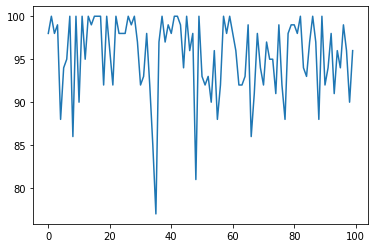

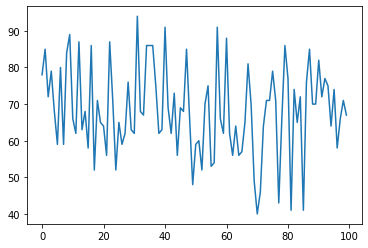

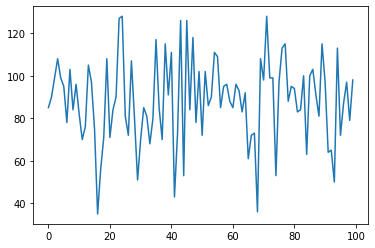

In [8]:
graphe_proba("aleatoire")
graphe_proba("heuristique")
graphe_proba("simplifié")